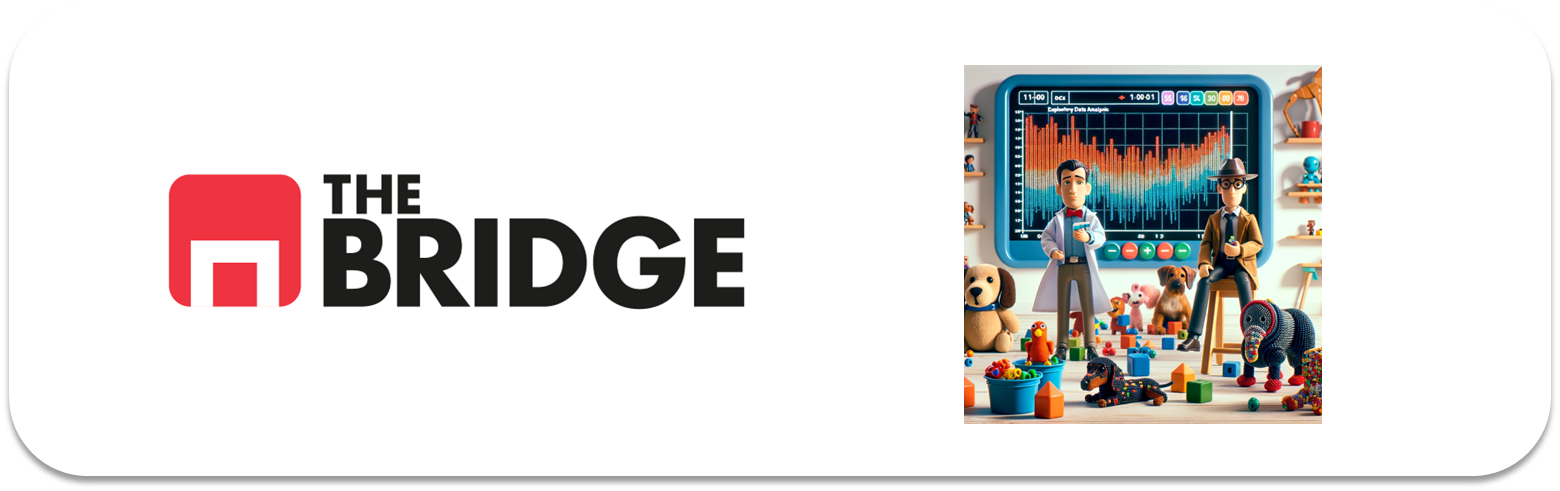

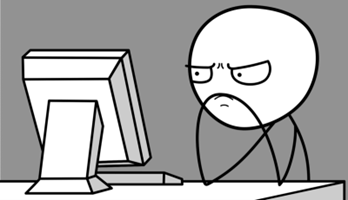

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import *


### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [4]:
df_admission = pd.read_csv("./data/admission_data.csv")
df_admission.head(5)

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected


In [5]:
df_admission.drop(["Unnamed: 0","Year"],inplace=True,axis = 1)
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Major      12763 non-null  object
 1   Gender     12763 non-null  object
 2   Admission  12763 non-null  object
dtypes: object(3)
memory usage: 299.3+ KB


### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

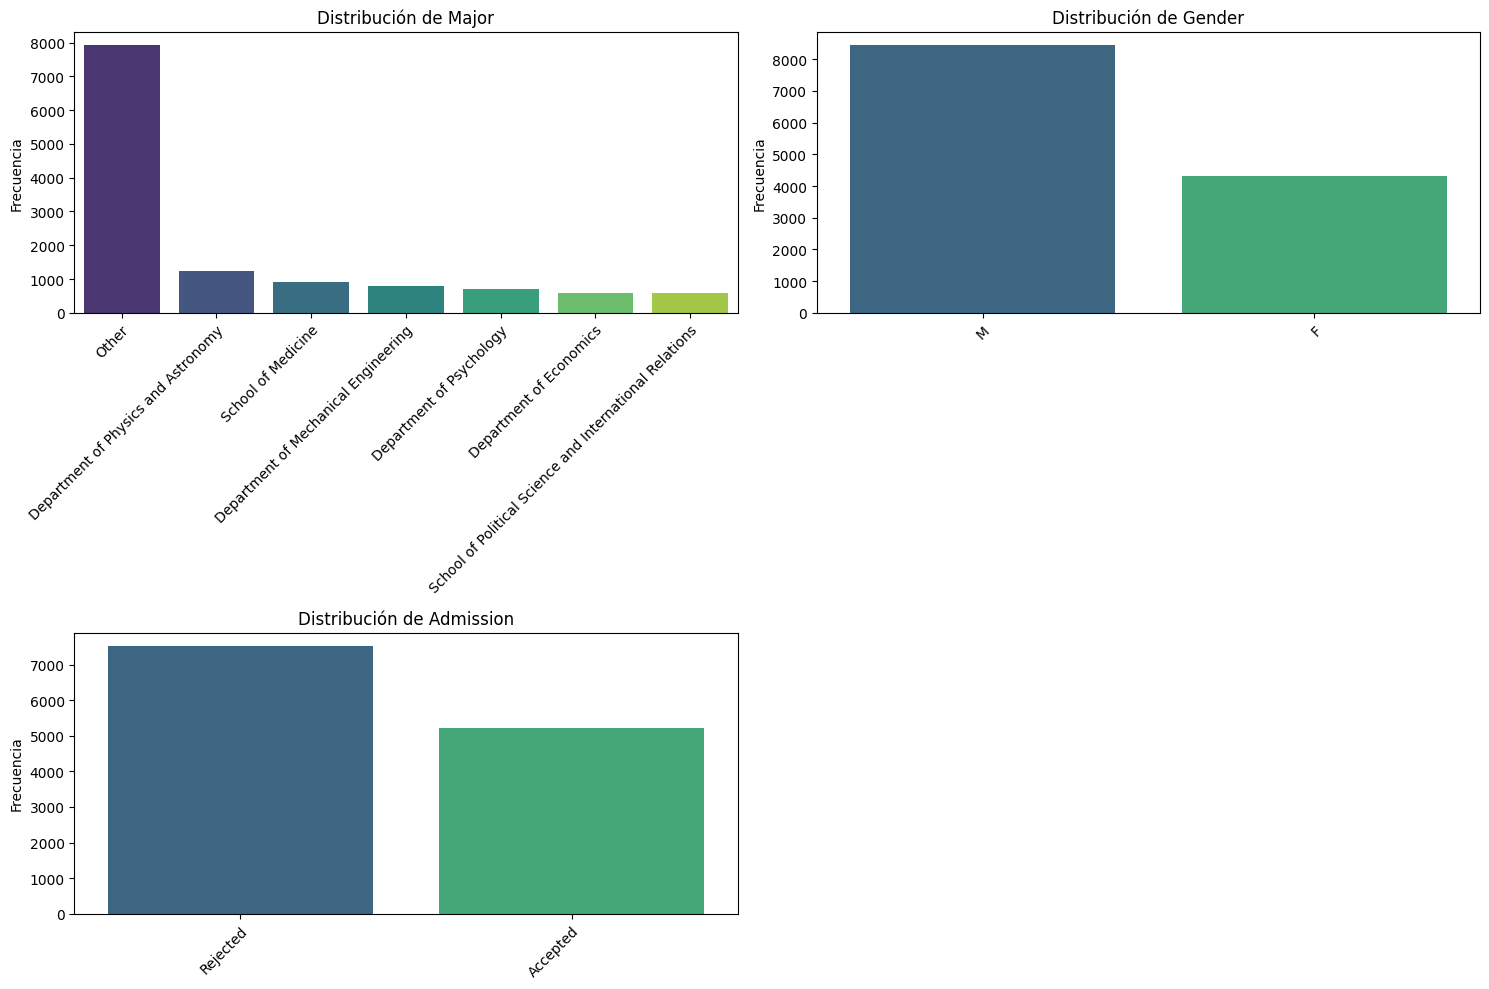

In [6]:
pinta_distribucion_categoricas_cgpt1(df_admission,["Major","Gender","Admission"])

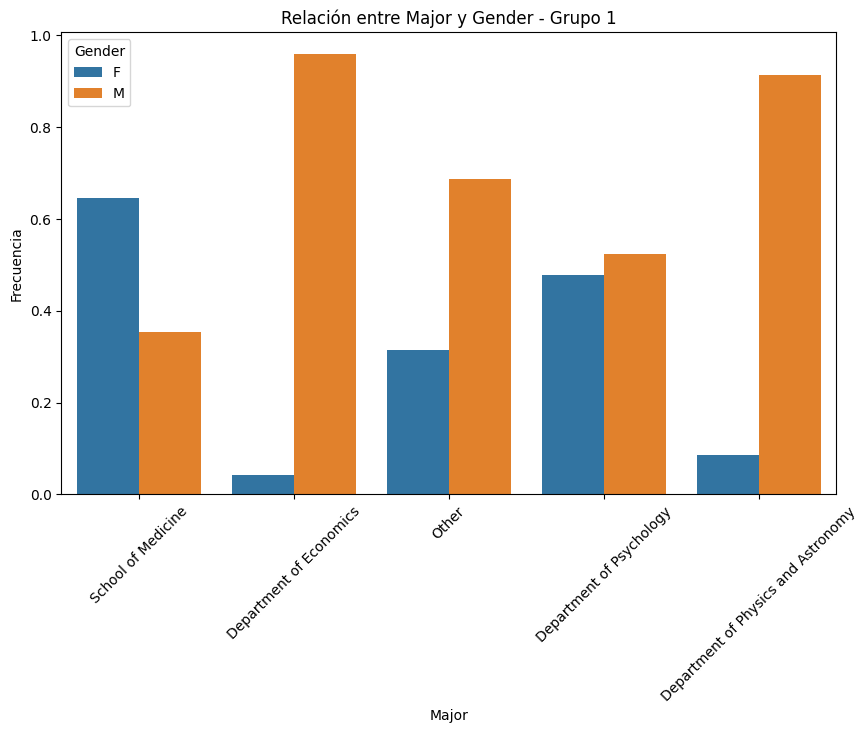

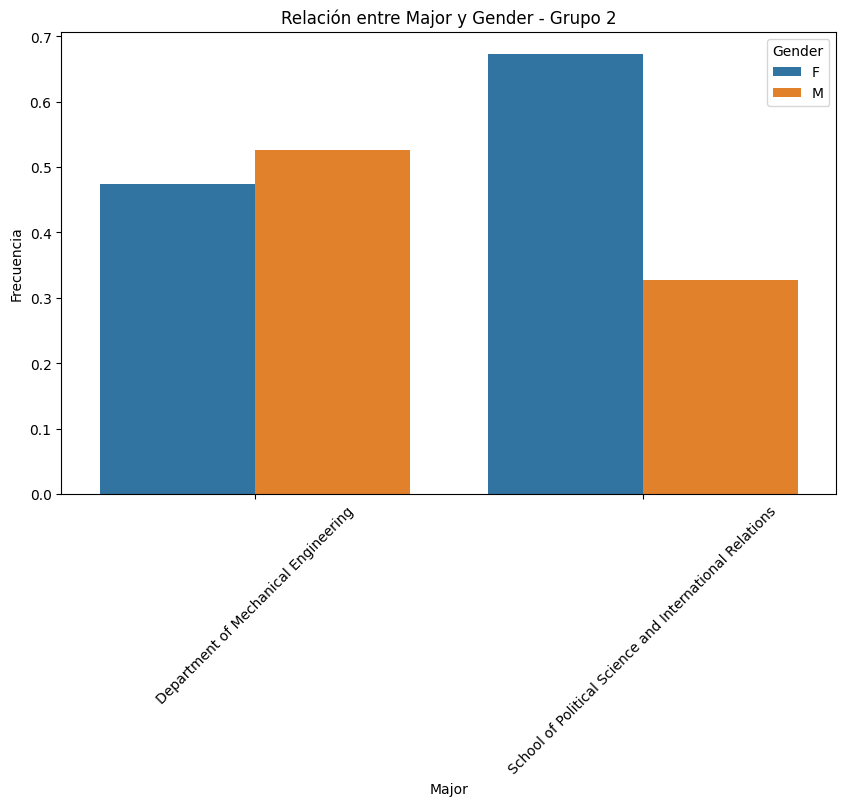

In [7]:
plot_categorical_relationship_fin(df_admission,"Major","Gender",relative_freq=True)

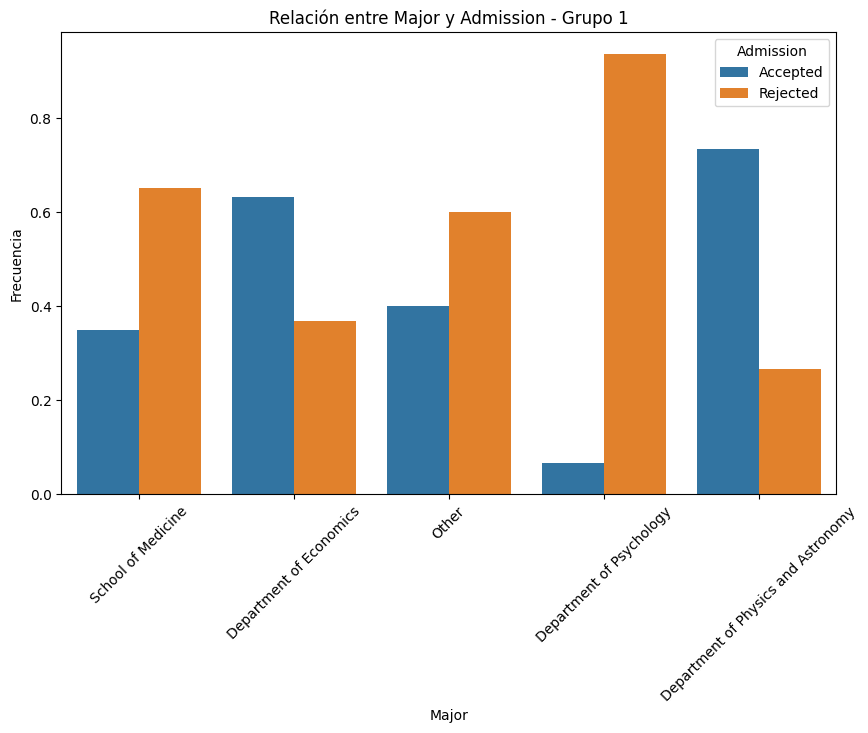

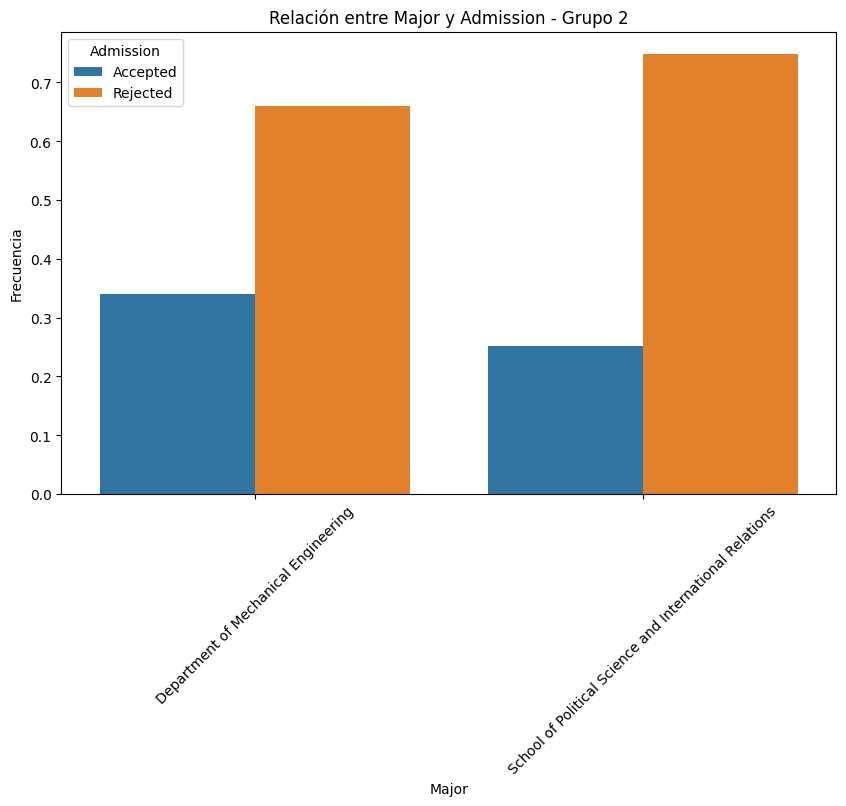

In [8]:
plot_categorical_relationship_fin(df_admission,"Major","Admission",relative_freq=True)

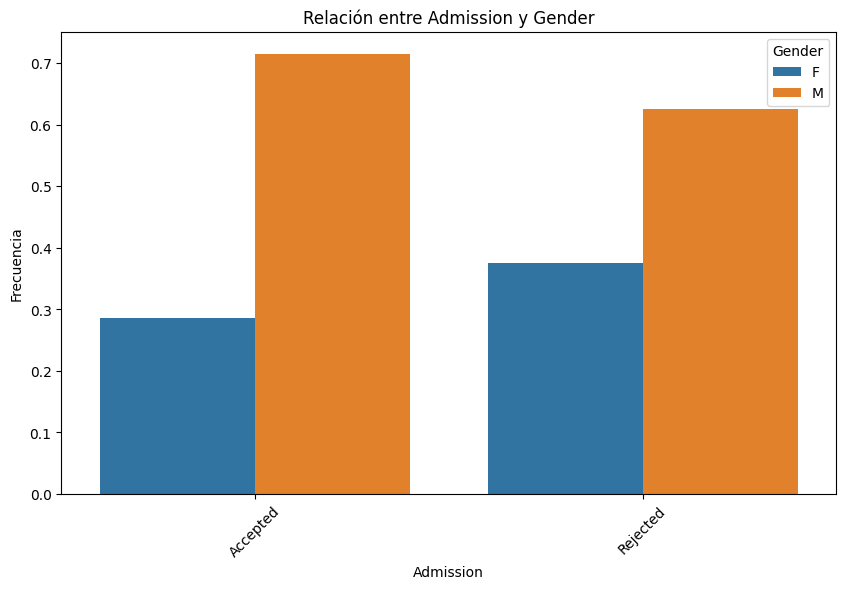

In [9]:
plot_categorical_relationship_fin(df_admission,"Admission","Gender",relative_freq=True)

In [10]:
columnas = ["Gender","Major","Admission"] 
col_directora = "Gender"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_admission[col_directora].unique():
    diccionario_multivariante[valor] = df_admission.loc[df_admission[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

print(diccionario_multivariante)

{'F':       Admission                                 Major
0      Rejected                    School of Medicine
2      Accepted                                 Other
6      Accepted              Department of Psychology
10     Rejected                                 Other
15     Rejected                                 Other
...         ...                                   ...
12744  Accepted  Department of Mechanical Engineering
12749  Rejected                                 Other
12755  Rejected                                 Other
12757  Rejected                                 Other
12760  Rejected                                 Other

[4321 rows x 2 columns], 'M':       Admission                                 Major
1      Accepted               Department of Economics
3      Accepted                                 Other
4      Rejected                                 Other
5      Rejected                                 Other
7      Accepted                              

Respuesta F:


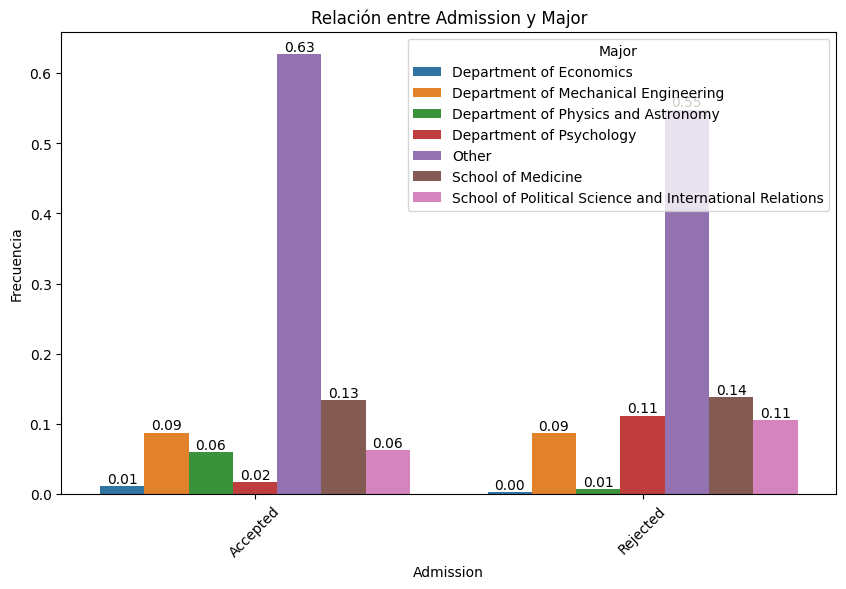

Respuesta M:


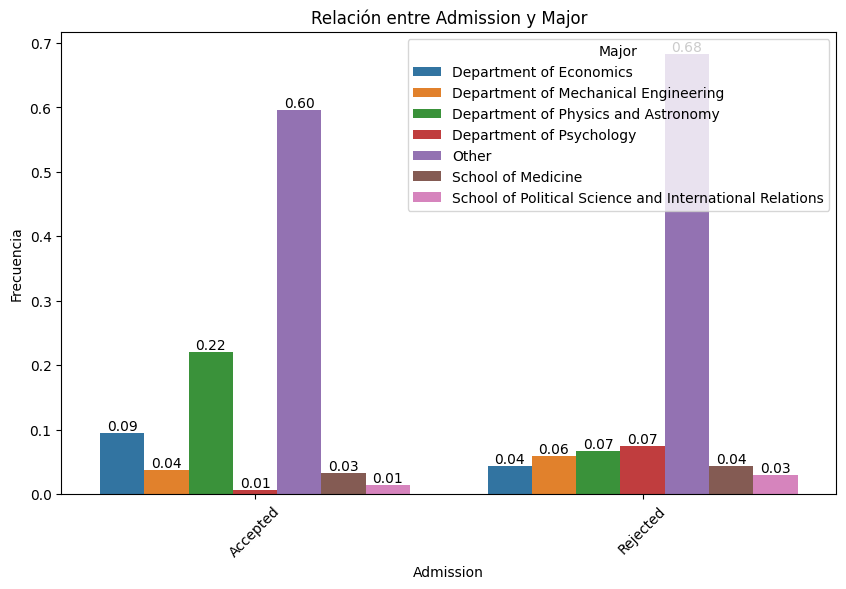

In [11]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

In [12]:
df_admission.loc[(df_admission["Gender"] == "F") & (df_admission["Major"] == "Department of Economics"),["Admission","Gender"]].value_counts()

Admission  Gender
Accepted   F         17
Rejected   F          8
Name: count, dtype: int64

In [13]:
df_admission.loc[(df_admission["Gender"] == "M") & (df_admission["Major"] == "Department of Economics"),["Admission","Gender"]].value_counts()

Admission  Gender
Accepted   M         353
Rejected   M         207
Name: count, dtype: int64

No parece que haya ningún tipo de discriminación

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [14]:
df_tip = pd.read_csv("./data/tips.csv")
df_tip.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
df_tip.drop("Unnamed: 0",axis=1,inplace=True)
df_tip.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
df_tip["%_tip"] = (df_tip["tip"]/df_tip["total_bill"]).round(2)
df_tip.head(8)

,total_bill,tip,sex,smoker,day,time,size,%_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15
5,25.29,4.71,Male,No,Sun,Dinner,4,0.19
6,8.77,2.00,Male,No,Sun,Dinner,2,0.23
7,26.88,3.12,Male,No,Sun,Dinner,4,0.12


In [17]:
df_tip["%_tip_size"] = (df_tip["tip"]/df_tip["size"]).round(2)
df_tip.head(8)

,total_bill,tip,sex,smoker,day,time,size,%_tip,%_tip_size
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06,0.50
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16,0.55
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17,1.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14,1.66
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15,0.90
5,25.29,4.71,Male,No,Sun,Dinner,4,0.19,1.18
6,8.77,2.00,Male,No,Sun,Dinner,2,0.23,1.00
7,26.88,3.12,Male,No,Sun,Dinner,4,0.12,0.78


### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [18]:
df_car = pd.read_csv("./data/car_crashes.csv",sep = "|")
df_car.head(5)

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [19]:
df_car.drop(["Unnamed: 0","abbrev"],axis=1,inplace=True)
df_car.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63


### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

(5, 2)


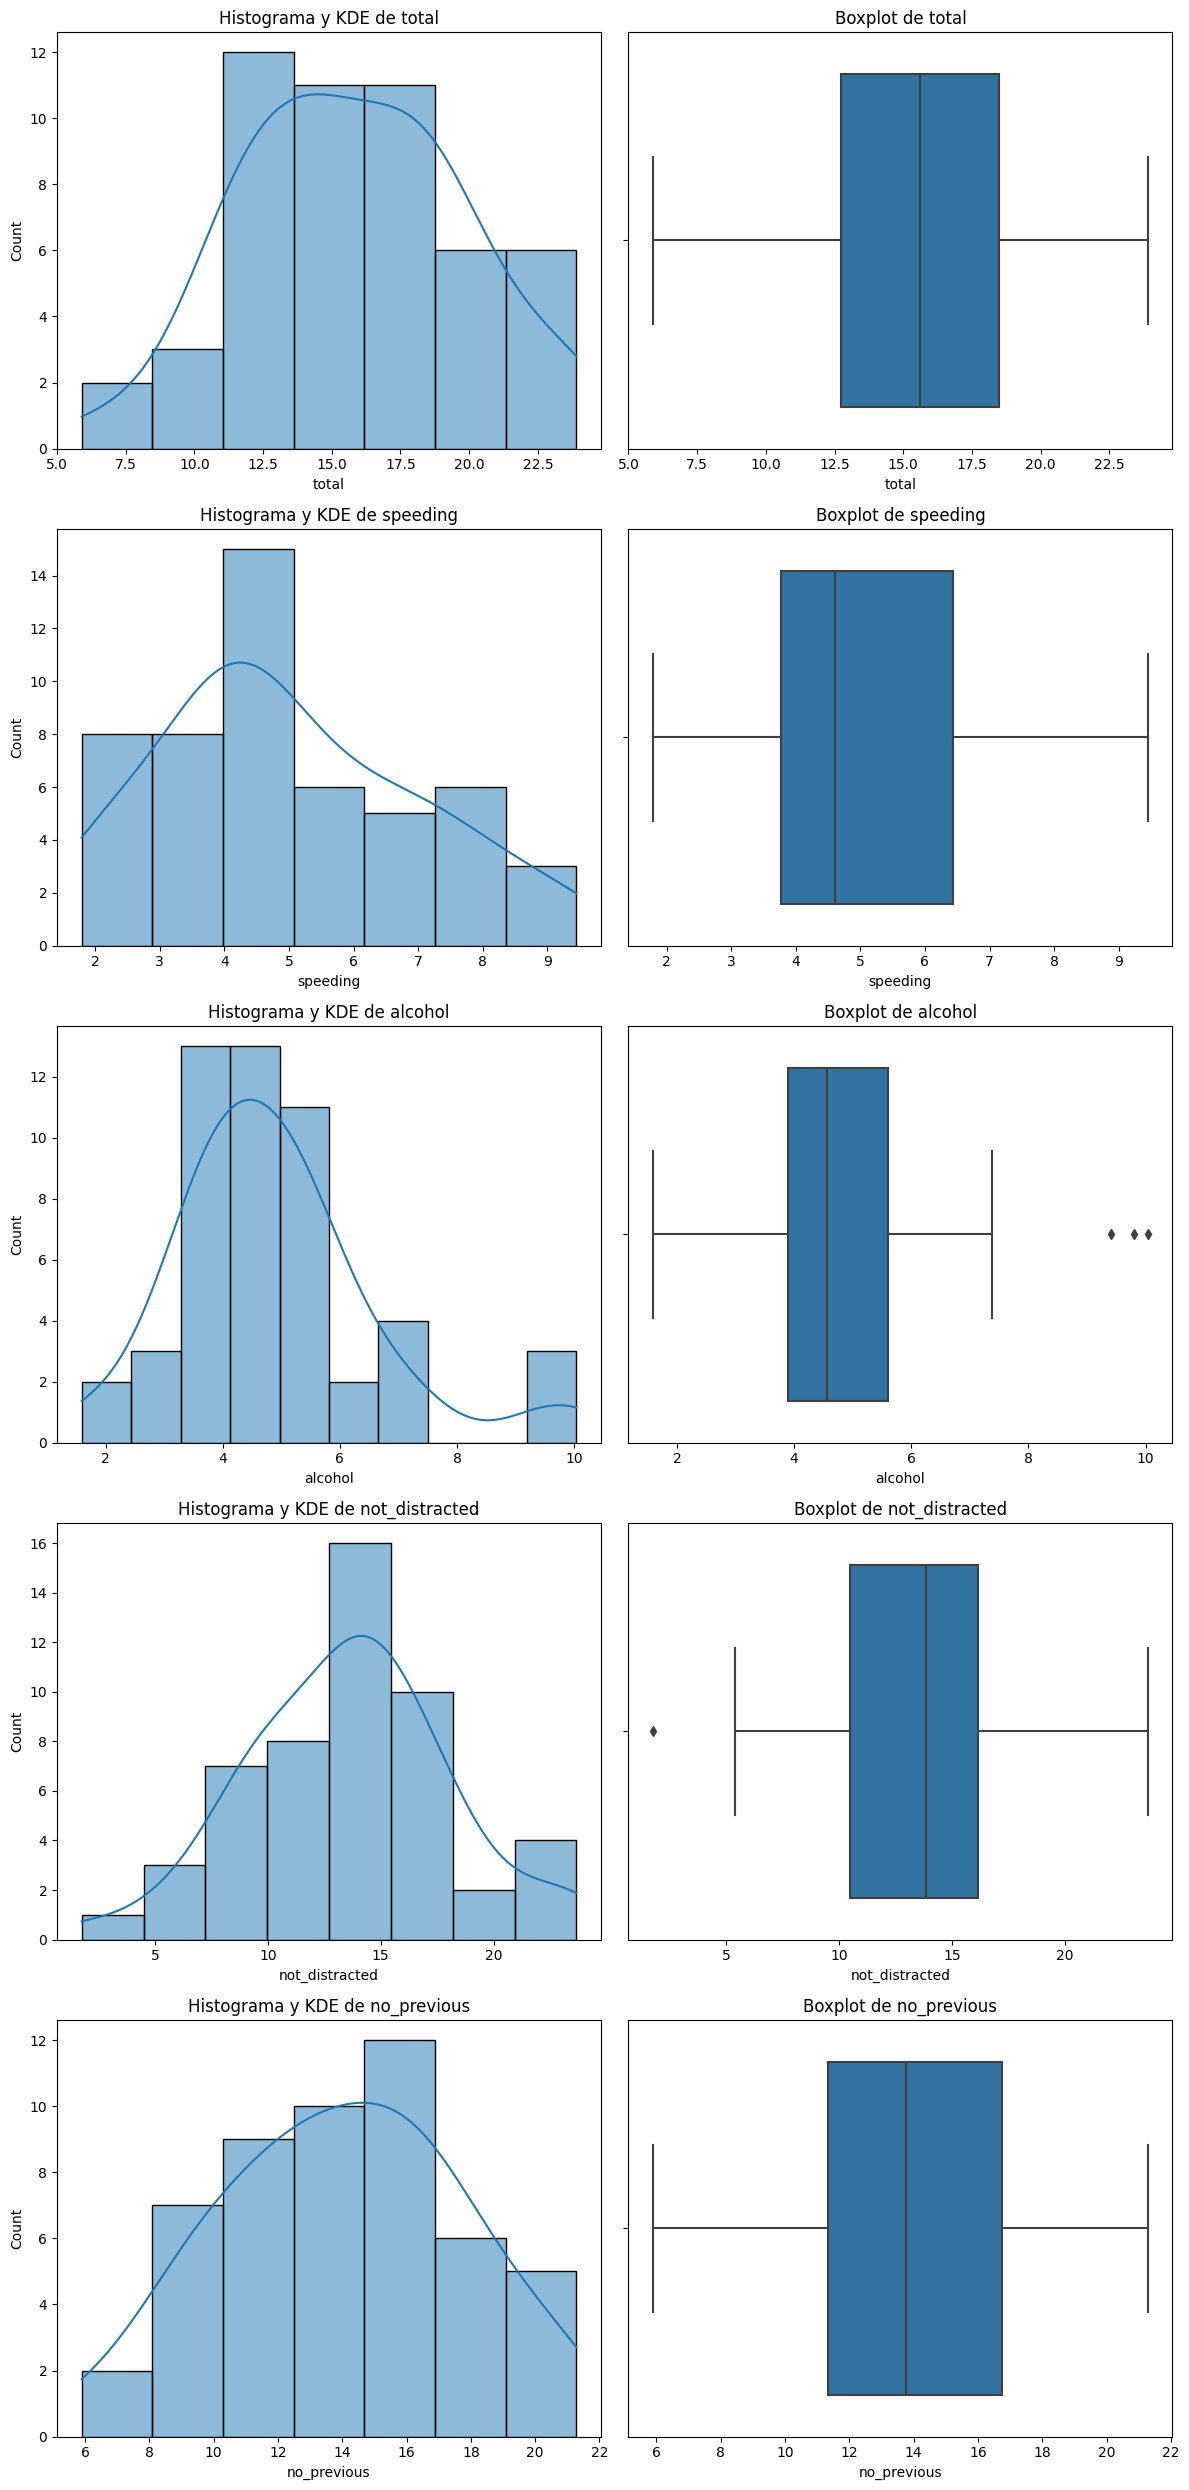

In [20]:
plot_combined_graphs(df_car,["total","speeding","alcohol","not_distracted","no_previous"])

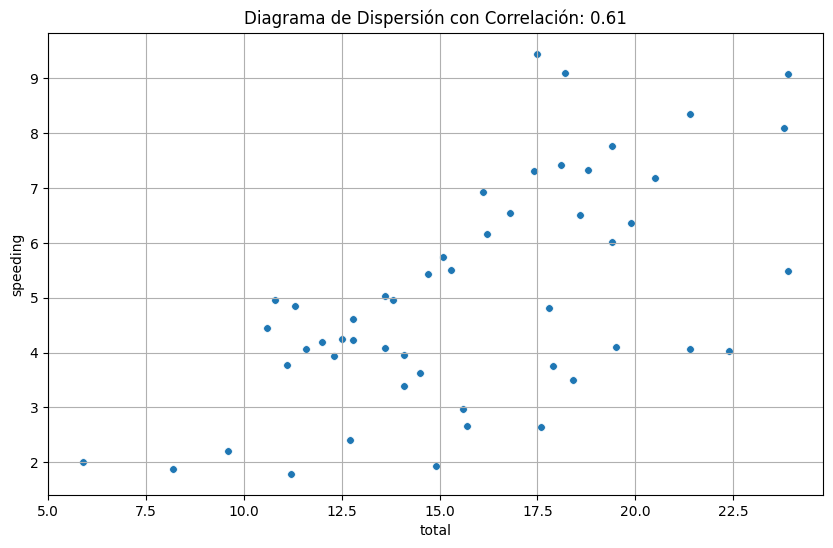

In [21]:
# Total y speeding
grafico_dispersion_con_correlacion(df_car,"total", "speeding", mostrar_correlacion= True, tamano_puntos= 30)

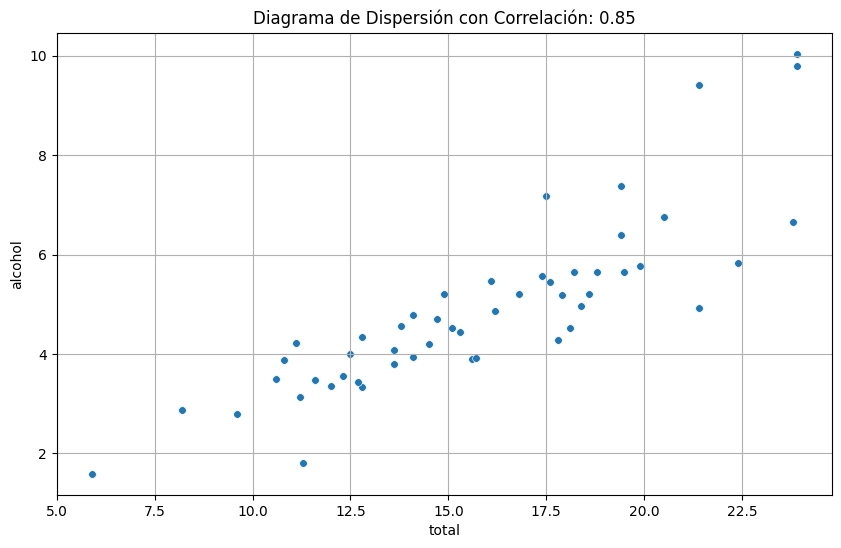

In [22]:
grafico_dispersion_con_correlacion(df_car,"total", "alcohol", mostrar_correlacion= True, tamano_puntos= 30)

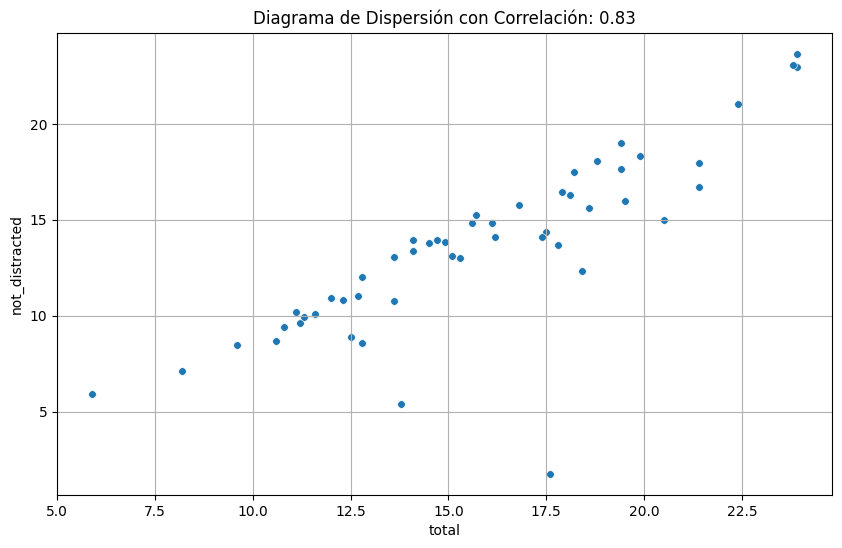

In [23]:
grafico_dispersion_con_correlacion(df_car,"total", "not_distracted", mostrar_correlacion= True, tamano_puntos= 30)

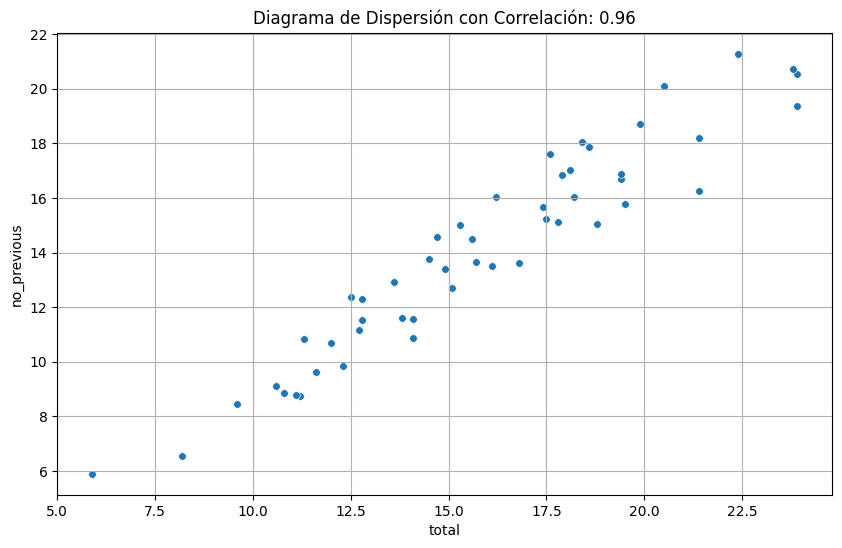

In [24]:
grafico_dispersion_con_correlacion(df_car,"total", "no_previous", mostrar_correlacion= True, tamano_puntos= 30)

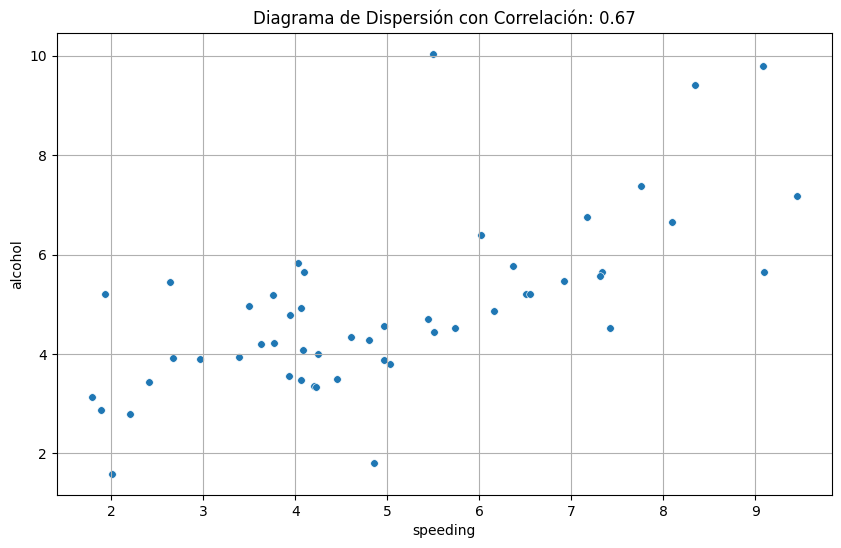

In [25]:
grafico_dispersion_con_correlacion(df_car,"speeding", "alcohol", mostrar_correlacion= True, tamano_puntos= 30)

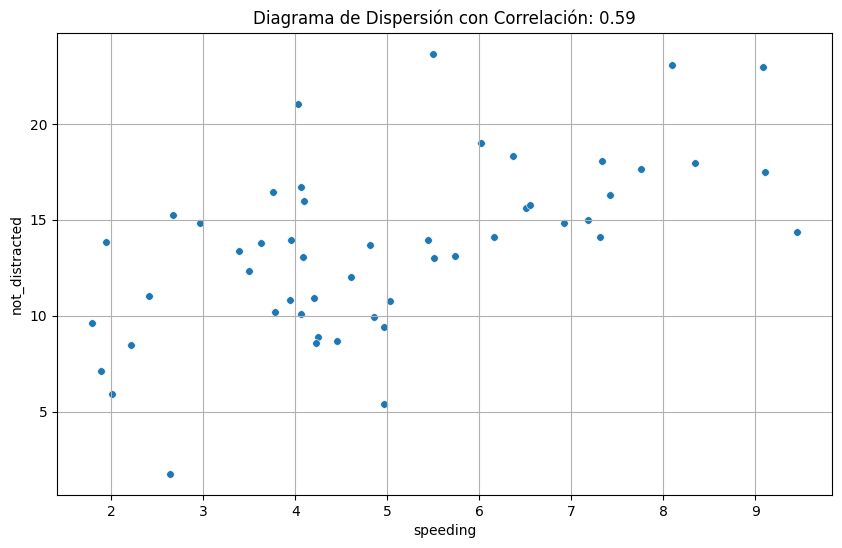

In [26]:
grafico_dispersion_con_correlacion(df_car,"speeding", "not_distracted", mostrar_correlacion= True, tamano_puntos= 30)

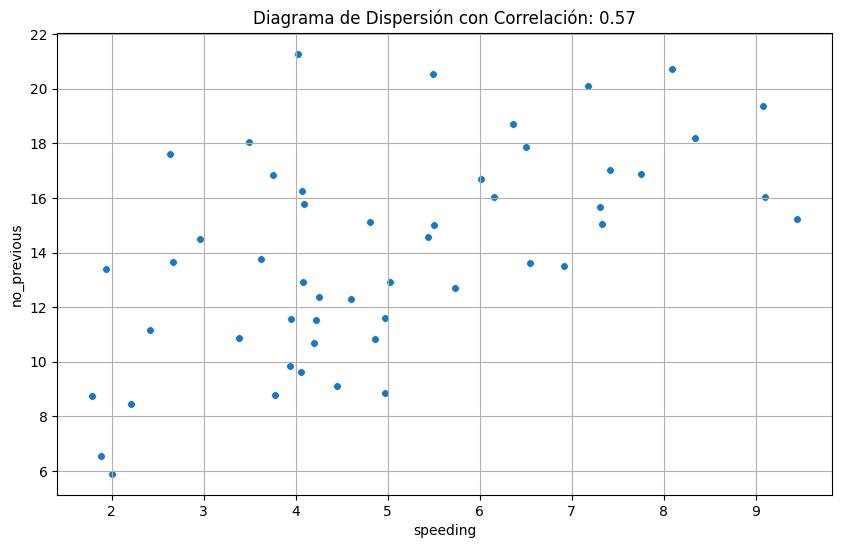

In [27]:
grafico_dispersion_con_correlacion(df_car,"speeding", "no_previous", mostrar_correlacion= True, tamano_puntos= 30)

In [28]:
corr_matrix = df_car.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


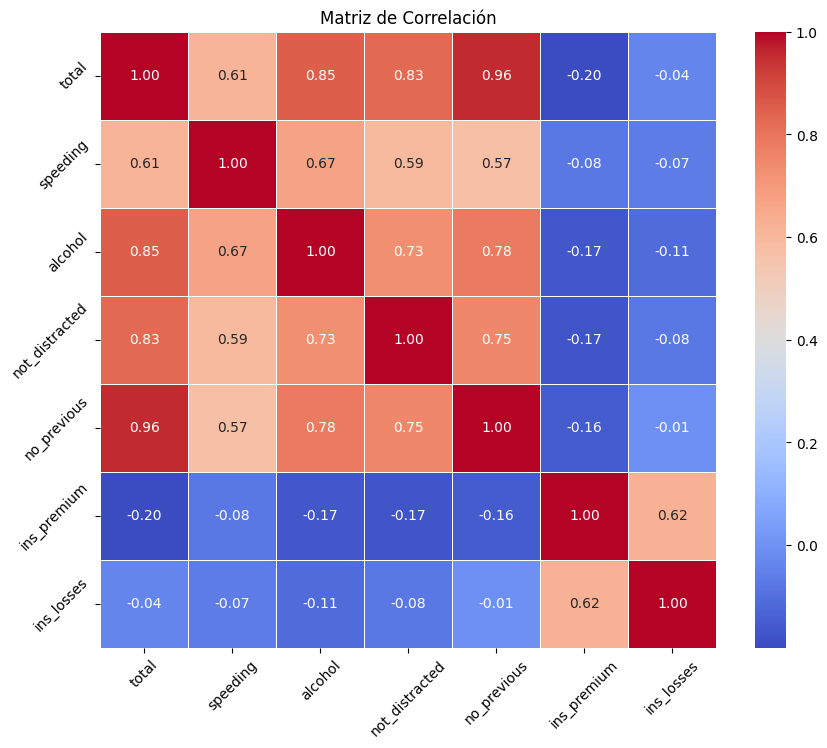

In [29]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

In [34]:
df_solo_numeros = df_car[["total","alcohol","speeding"]]
df_solo_numeros.columns

Index(['total', 'alcohol', 'speeding'], dtype='object')

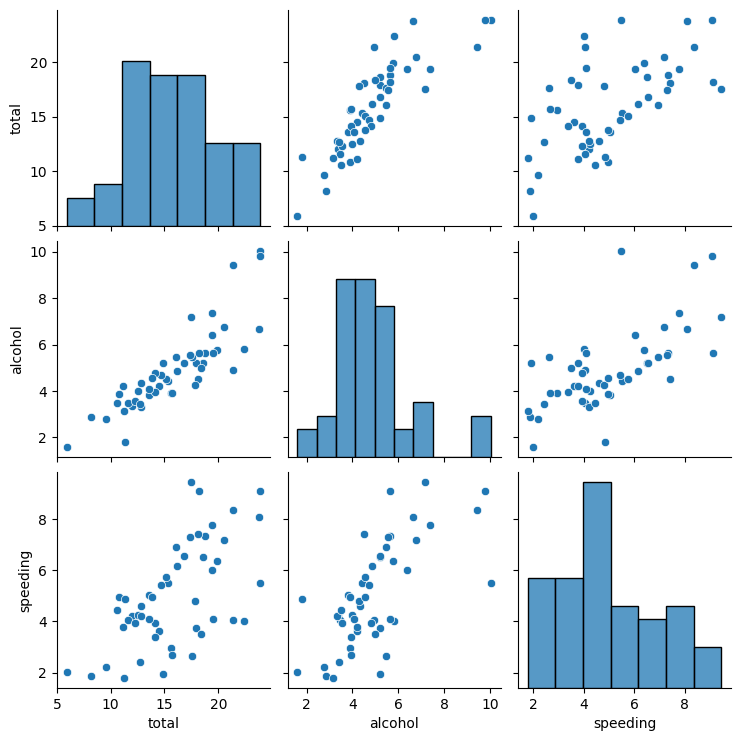

In [35]:
sns.pairplot(df_solo_numeros)
plt.show()